## Feature Selection/Extraction

Import libraries and data sets to be looked at:

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler


%matplotlib inline

# load dataset
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
macro = pd.read_csv('./data/macro.csv')

train_no_str = train.select_dtypes(exclude=['object'])
test_no_str = test.select_dtypes(exclude=['object'])

# Outliers/Transformations
Y_train = np.log1p(train['price_doc']).values
X_train = train.loc[:, train.columns != 'price_doc'].values
X_test = test.values

In [ ]:
def test_train_compare(test, train, feature):
    merged = {'test' : test[feature],
             'train' : train[feature]}

    return pd.DataFrame(merged)

In [86]:
# find correlation between features
def feature_correlation(df, cutoff):
    corr_df = df.corr()
    return corr_df[((corr_df > cutoff) | (corr_df < -cutoff)) & (corr_df != 1)].stack()

In [152]:
# transformations = [np.log1p, np.log10, 
#                    np.log, np.sqrt, np.square]

# numeric_feats = train.dtypes[train.dtypes != "object"].index

# corr_df = {}

# for feature in list(numeric_feats):
#     print stats.boxcox(train[feature])
# #     corr_df[feature] = stats.pearsonr(transformation(train[feature]), y=train['price_doc'])[0]
        
# # pd.DataFrame(corr_df, index = transformations)
  
stats.boxcox(train['price_doc'])

(array([ 134.95726048,  135.73519534,  134.16360046, ...,  140.43380469,
         163.08519755,  133.62539217]), 0.21963570977596455)

#### Feature #137: area_m
Description: Area mun. area, sq.m.

In [11]:
np.around(train['area_m'].describe())

count        30471.0
mean      17657051.0
std       20649608.0
min        2081628.0
25%        7307411.0
50%       10508030.0
75%       18036437.0
max      206071809.0
Name: area_m, dtype: float64

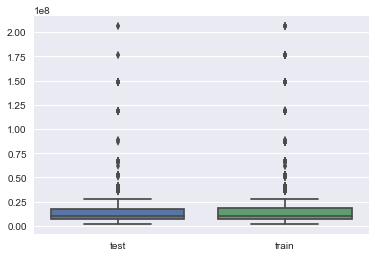

In [19]:
sns.boxplot(data = test_train_compare(test, train, 'area_m'))

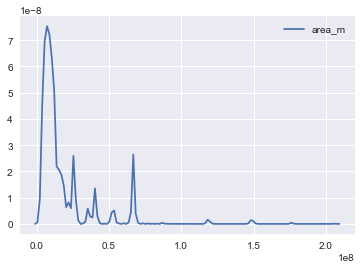

In [20]:
sns.kdeplot(train['area_m'])

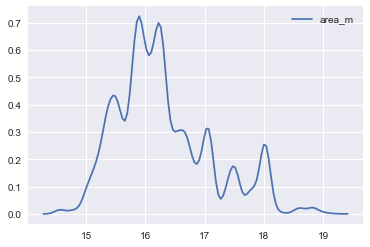

In [26]:
# Log transformation of area_m
sns.kdeplot(np.log1p(train['area_m']), kernel='gau')

In [110]:
merged = {'raion_popul' : train['raion_popul'],
             'full_all' : train['full_all']}

train.sample()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
29363,29366,2015-04-23,41,21.0,13.0,14.0,1.0,1996.0,1.0,8.0,...,5,2,0,10,25,0,2,50,9,7350000
